In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

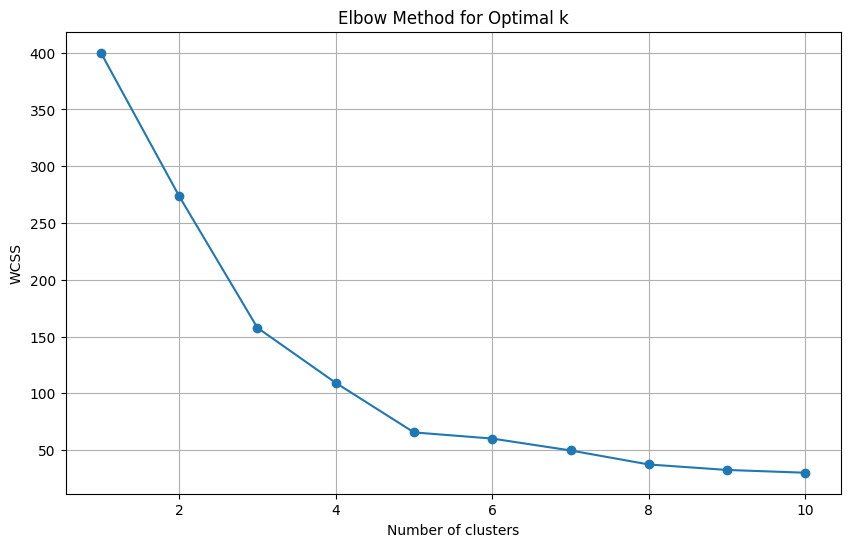

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters

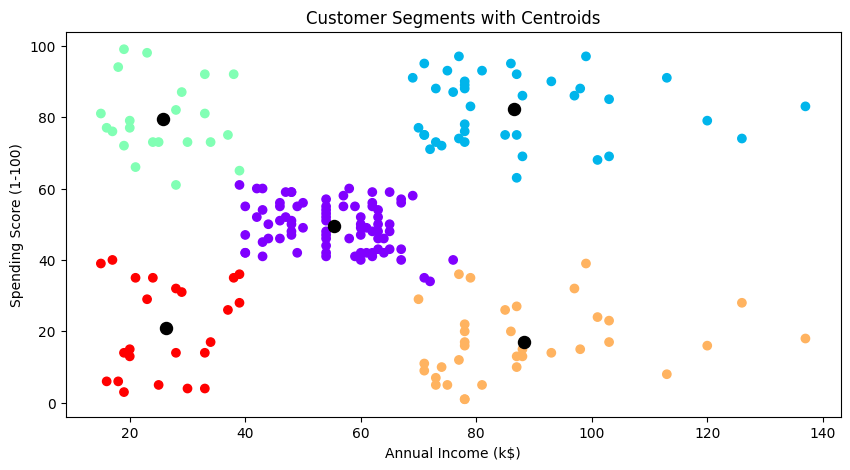

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='rainbow')
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='.')
plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

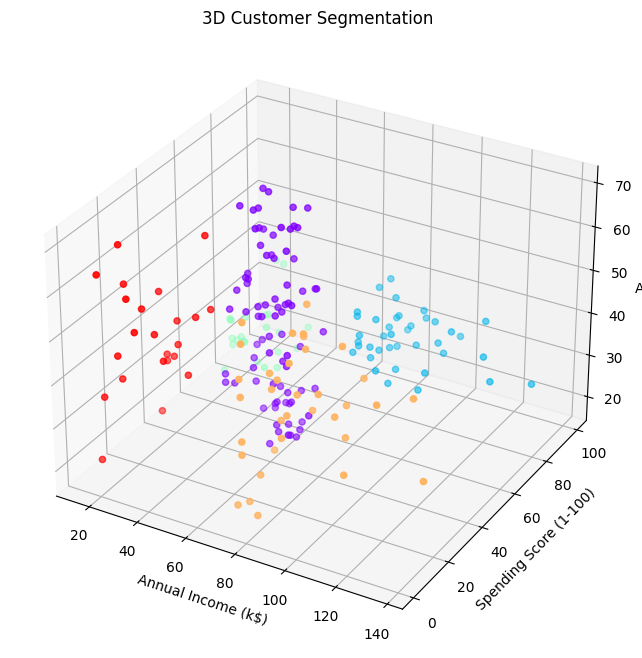

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

data['Age'] = data['Age'].fillna(data['Age'].mean())
ax.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], data['Age'], c=clusters, cmap='rainbow')
ax.set_title('3D Customer Segmentation')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show()

In [ ]:
cluster_analysis = data.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

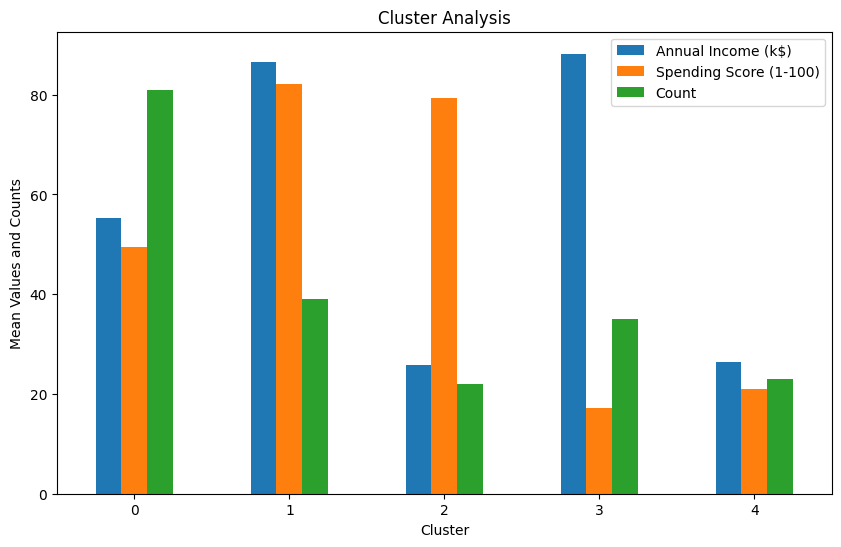

In [ ]:
cluster_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Analysis')
plt.xlabel('Cluster')
plt.ylabel('Mean Values and Counts')
plt.xticks(rotation=0)
plt.show()